# LINEAR FIT - X,EY,Y,EY

I want to test the linear fit (regression) on data with error on both x and y axis.
I will try the `scipy.odr` package.
First of all I have to set a seed to make this test reproducible.

In [2]:
%matplotlib inline
import numpy as np
seed = 12093487
np.random.seed(seed=seed)

Now lets create the noisy dataset:

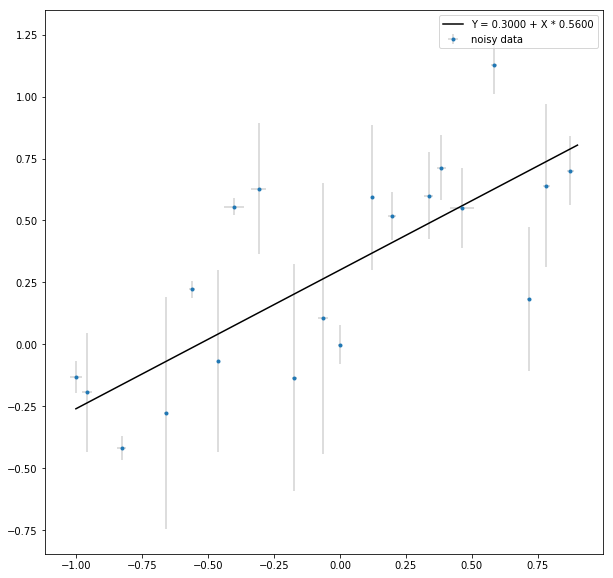

In [3]:
stddev_x = 0.02
stddev_y = 0.35
X = np.arange(-1., 1., 0.1) # creates the X axis, without noise
nX = np.shape(X)[0]
noisy_x = np.random.normal(loc=X, scale=stddev_x)
err_x = np.abs(np.random.normal(loc=0., scale=stddev_x, size=nX))
q, m = 0.3, 0.56 # True intercept and angular coeff. of the straight line
Y = q + m*X # creates the Y data, without noise
noisy_y = np.random.normal(loc=Y, scale=stddev_y)
err_y = np.abs(np.random.normal(loc=0., scale=stddev_y, size=nX))
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.errorbar(noisy_x, noisy_y, xerr=err_x, yerr=err_y,
             fmt='.', ls='',ecolor='lightgray', capsize=0., 
             label='noisy data')
plt.plot(X, Y, color='black', marker='None', ls='-', 
         label='Y = %.4f + X * %.4f' %(q, m))
plt.legend(loc='best')

Now I have to define the function, i.e. the linear function:

In [4]:
def lin_func(par, xdata):
    return par[0] + par[1]*xdata

Import the Orthogonal distance regression package from `scipy`, create the proper model and data, then run.

In [5]:
import scipy.odr as sciodr
lin_model = sciodr.Model(lin_func) # Create a Model
odr_data = sciodr.RealData(noisy_x, noisy_y, sx=err_x, sy=err_y) # Create RealData
init_par = [0., 0.] # initial parameters
#Instantiate ODR with your data, model and initial parameter estimate
odr_mod = sciodr.ODR(odr_data, lin_model, beta0=init_par)
# RUN IT and store output (scipy version 0.16.0) into an object!
odr_out = odr_mod.run()

Print results with the built-in function:

In [6]:
odr_out.pprint()

Beta: [ 0.49963603  0.67710057]
Beta Std Error: [ 0.08353352  0.13986418]
Beta Covariance: [[ 0.00066647  0.00073601]
 [ 0.00073601  0.0018684 ]]
Residual Variance: 10.4699232726
Inverse Condition #: 0.38576047441
Reason(s) for Halting:
  Sum of squares convergence


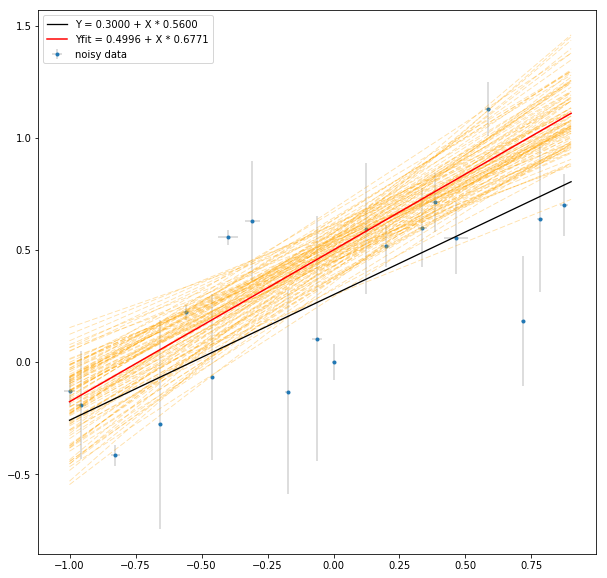

In [8]:
plt.figure(figsize=(10,10))
# save final parameters fit and errors
out_par = odr_out.beta
out_std = odr_out.sd_beta
Yfit = out_par[0] + out_par[1]*X
# plot data
plt.errorbar(noisy_x, noisy_y, xerr=err_x, yerr=err_y, 
             fmt='.', ls='',ecolor='lightgray', capsize=0., zorder=4,
             label='noisy data')
# plot true straight line
plt.plot(X, Y, color='black', marker='None', ls='-', lw=1.3, zorder=6,
         label='Y = %.4f + X * %.4f' %(q, m))
# plot fitted line
plt.plot(X, Yfit, color='red', marker='None', ls='-', lw=1.5, zorder=7, 
         label='Yfit = %.4f + X * %.4f' %(out_par[0], out_par[1]))
# plot a few lines sampled from out_par and out_std
nsample = 100
for ismp in range(0, nsample):
    Ysmp = np.random.normal(loc=out_par[0], scale=out_std[0]) + np.random.normal(loc=out_par[1], scale=out_std[1])*X
    plt.plot(X, Ysmp,
             color='orange', marker='None', ls='--', lw=0.9, alpha=0.33, zorder=5)
plt.legend(loc='best')
